In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
df = pd.read_csv('thomascup_2022_tweets.csv')

In [5]:
df.head(10)

,id,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1529235395812155392,"India has won the Thomas cup, @nikhat_zareen ...",themohanty_,"['India', 'IndianEra']",2022-05-24 22:58:24+00:00,43,0,0,3,0,en,NaN,NaN,NaN,"India has won the Thomas cup, @nikhat_zareen ..."
1,1528224948111941633,PM’s interaction with Thomas Cup Champions is ...,goikarpk,"['India', 'ThomasCup']",2022-05-22 04:03:15+00:00,51,0,0,1,0,en,NaN,NaN,NaN,PM’s interaction with Thomas Cup Champions is ...
2,1527216966171144193,India won maiden Thomas Cup after defeating 14...,BeShararat,"['ThomasCup', 'India', 'ThomasUberCup2022']",2022-05-19 09:17:53+00:00,4,0,1,1,0,en,NaN,NaN,NaN,India won maiden Thomas Cup after defeating 14...
3,1526912239910785024,#India's bunch of exceptionally proficient #Ba...,aaiprayagraj,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 13:07:01+00:00,1553,0,1,1,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...
4,1526893293136924672,#India's bunch of exceptionally proficient #Ba...,aaisapairport,"['India', 'Badminton', 'ThomasCup2022', 'Bangk...",2022-05-18 11:51:44+00:00,1192,0,0,0,0,en,NaN,NaN,NaN,#India's bunch of exceptionally proficient #Ba...
5,1526498843566952448,India won by 3-0 from Indonesia and Greenit is...,greenitfoods,"['ThomasCup2022', 'ThomasCup', 'Greenit', 'Ind...",2022-05-17 09:44:19+00:00,4,0,0,2,0,en,NaN,NaN,NaN,India won by 3-0 from Indonesia and Greenit is...
6,1526426936909570049,Many many congratulations to Indian team for w...,AenSaharan,"['ThomasCup2022', 'BadmintonIndonesia', 'Thoma...",2022-05-17 04:58:36+00:00,12,0,0,0,0,en,NaN,NaN,NaN,Many many congratulations to Indian team for w...
7,1526288164754702336,@ANI Historic: #India🇮🇳 won #ThomasCup for fir...,Mittul_253,"['India', 'ThomasCup', 'Indonesia', 'Proud_Ind...",2022-05-16 19:47:10+00:00,141,0,2,12,0,en,NaN,1.526288e+18,https://twitter.com/ANI,@ANI Historic: #India🇮🇳 won #ThomasCup for fir...
8,1526259384099405824,The nation stands thrilled as the Indian #Badm...,ThatBenzeneRing,"['Badminton', 'ThomasCup', 'India', 'History']",2022-05-16 17:52:48+00:00,59,0,8,10,0,en,NaN,NaN,NaN,The nation stands thrilled as the Indian #Badm...
9,1526229405038616576,Congrats to #IndianBadmintonTeam on the histor...,Indian_Rainman,"['IndianBadmintonTeam', 'ThomasCup2022', 'Thom...",2022-05-16 15:53:40+00:00,5376,0,1,9,0,en,NaN,NaN,NaN,Congrats to #IndianBadmintonTeam on the histor...


## Data Spliting

In [6]:
X = df[['user followers count', 'retweetcount', 'likecount', 'replycount']]
Y = df['quotecount']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

## 2 Algoritma

### Decission tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
print(X_test.shape)
print(Y_train.shape)

(2426, 4)
(7278,)


In [11]:
modelDTree = DecisionTreeClassifier().fit (X_train, Y_train)

In [12]:
prediction = modelDTree.predict(X_test)

In [13]:
import sklearn

In [14]:
print(sklearn.metrics.confusion_matrix(Y_test, prediction))

[[2236   48    6 ...    0    0    0]
 [  61    7    2 ...    0    0    0]
 [   4    2    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0    0]]


In [15]:
print(sklearn.metrics.accuracy_score(Y_test, prediction)*100, '%')

92.53915910964551 %


### Linier Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
x = df[["retweetcount"]]
y = df["quotecount"] 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [19]:
modelLinReg =LinearRegression().fit(x_train, y_train)

In [20]:
modelLinReg.score(x_train, y_train)

0.4597963246944602

In [21]:
modelLinReg.score(x_test, y_test)

0.07627878041868397

## Tampilkan score dari model-model tersebut untuk classification


### K-Nearest Neighbor

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
modelKKN = KNeighborsClassifier(n_neighbors = 5)

In [24]:
modelKKN.fit(X_train, Y_train)

KNeighborsClassifier()

In [25]:
modelKKN.score(X_test, Y_test)

0.9431162407254741

In [26]:
modelKKN.score(X_train, Y_train)

0.9512228634240176

## Tampilan visualisasi untuk pendekatan regression.

In [27]:
y_pred = modelLinReg.predict(x_test)

In [28]:
import matplotlib.pyplot as plt


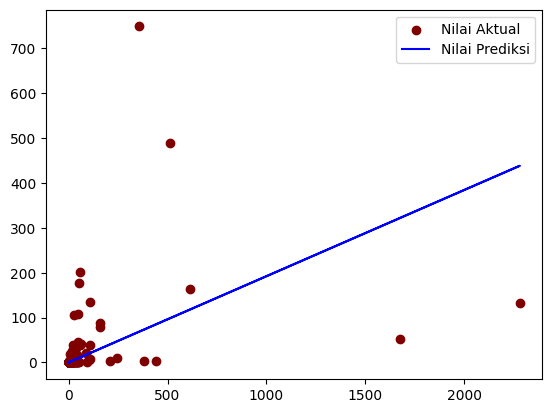

In [29]:
plt.scatter(x_test, y_test, color="maroon", label="Nilai Aktual")
plt.plot(x_test, y_pred, color= "blue", label="Nilai Prediksi")
plt.legend()
plt.show()

## Regression

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [31]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared= False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print("mse:",mse)
print("rmse:",rmse)
print("mae:",mae)
print("r2:",r2)

mse: 375.1370624358345
rmse: 19.368455344601813
mae: 1.4927335006049363
r2: 0.07627878041868397
